<h1 style='color: #ff4500; font-size: 34px; font-weight: bold;'>Previsão de Preços de Combustíveis: Análise e Estimativa Futura

</h1>


# <font color="#4500ff" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #4500ff;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b>O objetivo deste projeto é desenvolver modelos de previsão de preços de combustíveis com base em dados históricos. Por meio da análise exploratória e da aplicação de técnicas de séries temporais e regressão, buscamos criar modelos que estimem com precisão os preços futuros dos combustíveis. A avaliação e ajuste desses modelos permitirão entender as tendências de mercado e melhorar a capacidade de planejamento financeiro.</b></i>     
</p>

---

# <font color="#4500ff" style="font-size: 30px;">Roteiro</font>
<hr style="border: 2px solid #4500ff;">

<h1 style='color: black; font-size:22px; font-weight: bold;'> 1. Carregamento e Pré-processamento dos Dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'>2. Análise Exploratória de Dados

</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
3. Preparação dos Dados para Previsão // Divisão em Conjuntos de Treinamento e Teste // Treinamento
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
4. Avaliação do Modelo
</h1>

---



# <font color="#4500ff" style="font-size: 30px;">1. Carregamento e Pré-processamento dos Dados </font>
<hr style="border: 2px solid #4500ff;">

In [394]:
# IMPORTANMDO BIBLIOTECAS

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import plotly.express as px
import locale
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [366]:
# Importando Dataset 

df = pd.read_csv(os.path.join("Datasets", "ca-2018-2022.csv"))
df.head(10)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,LIMA & MORAIS IMPORTAÇÃO E EXPORTAÇÃO LTDA.,07.073.586/0002-44,ESTRADA DA FLORESTA,4279,0,FLORESTA SUL,69912-443,DIESEL,2018-01-11,4.070,0.0000,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,S,PR,CIANORTE,JACOMELI & CARMINATI LTDA,05.015.593/0001-83,AVENIDA : MARANHAO,1244,0,ZONA 07,87200-000,DIESEL,2018-04-16,3.260,0.0000,R$ / litro,CIAPETRO
2,N,RO,VILHENA,AUTO POSTO PLANALTO LTDA,34.764.472/0001-32,AVENIDA CELSO MAZUTTI,6125,0,JARDIM ELDORADO,76980-002,DIESEL S10,2018-05-09,4.010,0.0000,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,ES,VILA VELHA,DIRCEU COMERCIO E REPRESENTACOES LTDA,27.732.460/0001-60,RODOVIA DO SOL,SN,KM: 25;,PONTA DA FRUTA,29129-015,ETANOL,2018-04-26,3.590,0.0000,R$ / litro,RAIZEN
4,SE,RJ,NITEROI,POSTO DE GASOLINA KING KONG EIRELI,29.756.947/0001-09,RUA VISCONDE DO RIO BRANCO,756,0,CENTRO,24020-003,GASOLINA,2018-03-29,4.897,4.2964,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
5,SE,MG,SABARA,POSTO SANTA INES MINAS LTDA,21.662.242/0001-10,AVENIDA CONTAGEM,1980,0,ANA LUCIA,34710-000,ETANOL,2018-01-15,3.099,0.0000,R$ / litro,ALESAT
6,SE,SP,PIRASSUNUNGA,RODOPOSTO CORAL LTDA,54.844.998/0001-30,RODOVIA ANHANGUERA,S/N,KM 210,TABOAO,13630-000,DIESEL S10,2018-04-02,3.298,0.0000,R$ / litro,RAIZEN
7,CO,GO,AGUAS LINDAS DE GOIAS,AUTO POSTO JARDIM BRASILIA LTDA,02.316.635/0001-28,AVENIDA JK,SN,QD 06 LTS 18/22,JARDIM BRASILIA,72910-001,ETANOL,2018-01-31,3.090,3.0067,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
8,SE,ES,VILA VELHA,POSTO TRES COQUEIROS LTDA,36.336.386/0001-54,RODOVIA CARLOS LINDEMBERG,SN,0,ALVORADA,29123-600,DIESEL,2018-05-24,3.590,3.2471,R$ / litro,IPIRANGA
9,NE,PE,PETROLINA,AUTO POSTO GENE LTDA,03.544.644/0004-81,RUA DO TAMARINDO,S/N,LOTE 13 E 14 QUADRA B,RIO CORRENTE,56312-695,ETANOL,2018-02-15,3.595,2.7845,R$ / litro,ALE COMBUSTÍVEIS


<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 30px;">Eliminando colunas e tratando dados</font>

<hr style="border: 2px solid #00cd37;">

In [367]:
df.drop(['Unidade de Medida', 'Nome da Rua', 'Numero Rua', 'Bairro', 'Cep'], axis=1, inplace=True)

In [368]:
df.columns = ['Regiao', 'Estado', 'Municipio', 'Revenda',
       'CNPJ_da_Revenda', 'Complemento', 'Produto', 'Data_da_Coleta',
       'Valor_de_Venda', 'Valor_de_Compra', 'Bandeira']

In [369]:
regioes ={
    'SE': 'SUDESTE',
    'NE': 'NORDESTE',
    'S': 'SUL',
    'CO' : 'CENTRO_OESTE',
    'N' : 'NORTE'
}

estados = {
    'AC': 'ACRE',
    'PR': 'PARANÁ',
    'RO': 'RONDÔNIA',
    'ES': 'ESPÍRITO_SANTO',
    'RJ': 'RIO_DE_JANEIRO',
    'MG': 'MINAS_GERAIS',
    'SP': 'SÃO_PAULO',
    'GO': 'GOIÁS',
    'PE': 'PERNAMBUCO',
    'RS': 'RIO_GRANDE_DO_SUL',
    'SC': 'SANTA_CATARINA',
    'RN': 'RIO_GRANDE_DO_NORTE',
    'PB': 'PARAÍBA',
    'CE': 'CEARÁ',
    'MS': 'MATO_GROSSO_DO_SUL',
    'PA': 'PARÁ',
    'MT': 'MATO_GROSSO',
    'TO': 'TOCANTINS',
    'BA': 'BAHIA',
    'DF': 'DISTRITO_FEDERAL',
    'AM': 'AMAZONAS',
    'MA': 'MARANHÃO',
    'RR': 'RORAIMA',
    'AP': 'AMAPÁ',
    'PI': 'PIAUÍ',
    'AL': 'ALAGOAS',
    'SE': 'SERGIPE'
}


df['Regiao'] = df['Regiao'].map(regioes)
df['Estado'] = df['Estado'].map(estados)

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 30px;">Verificando valores nulos</font>

<hr style="border: 2px solid #00cd37;">

In [370]:
df.info() 

#Sem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Regiao           250000 non-null  object 
 1   Estado           250000 non-null  object 
 2   Municipio        250000 non-null  object 
 3   Revenda          250000 non-null  object 
 4   CNPJ_da_Revenda  250000 non-null  object 
 5   Complemento      250000 non-null  object 
 6   Produto          250000 non-null  object 
 7   Data_da_Coleta   250000 non-null  object 
 8   Valor_de_Venda   250000 non-null  float64
 9   Valor_de_Compra  250000 non-null  float64
 10  Bandeira         250000 non-null  object 
dtypes: float64(2), object(9)
memory usage: 21.0+ MB


In [371]:
# a coluna "Valor_de_vendas" tem mais informações que a coluna "valor_de_compra"
df.drop(['Valor_de_Compra', 'Complemento'], axis=1, inplace = True)

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 30px;">Coluna de data --> Converter datetime</font>

<hr style="border: 2px solid #00cd37;">

In [372]:
df['Data_da_Coleta'] = pd.to_datetime(df['Data_da_Coleta'], format='%Y/%m/%d')

In [373]:
df['Ano'] = df['Data_da_Coleta'].dt.year

# <font color="#4500ff" style="font-size: 30px;">2. Análise Exploratória de Dados </font>
<hr style="border: 2px solid #4500ff;">

perguntas:
---
qual variação do preço dos combustíveis com o passar do tempo?
---
qual a distribuição dos combustíveis dentro da amostra?
---
Há diferença no preço dos combustíveis a depender da região do brasil?
---
Qual estado tem o preço médio de Gasolina mais caro?
---

In [374]:
df_plot = df.groupby(['Produto', 'Ano'])['Valor_de_Venda'].mean().to_frame().reset_index()

C:\Users\Migue\AppData\Local\Temp\ipykernel_12368\2597018828.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.03, 'Preço dos Combustíveis ao longo do tempo')

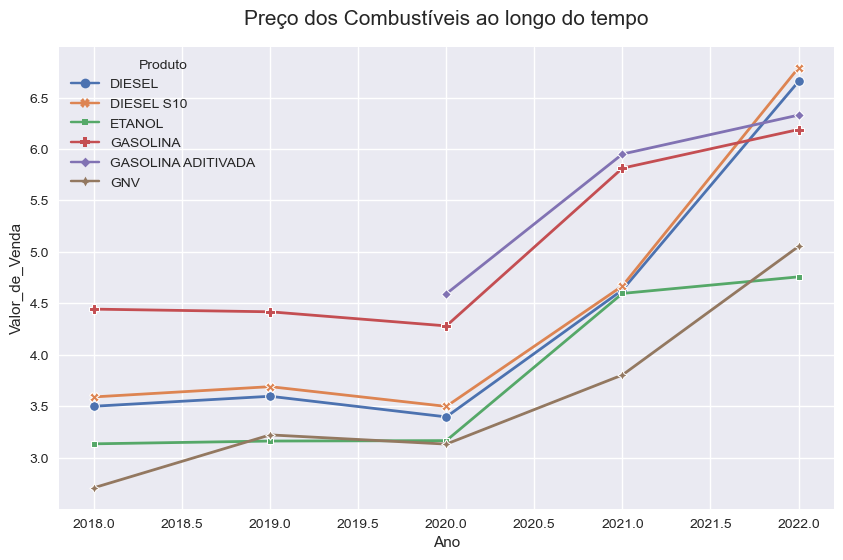

In [375]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Background da figura
plt.style.use('seaborn')

#Gráfico
sns.lineplot(data=df_plot, x="Ano", y="Valor_de_Venda", hue='Produto', style='Produto',  markers=True, dashes=False, palette='deep', linewidth=2)

# Configurações do gráfico
plt.title("Preço dos Combustíveis ao longo do tempo", fontsize=15, y =1.03)

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">Podemos perceber que de 2018 a 2020 o preço do combustíveis variou pouco, a maioria não variou nem 50 centavos</font>

## <font color=#00cd37 style="font-size: 25px;">Porém, de 2020 em diante houve um grande aumento no valor de venda, que depois continuou a crescer mais de forma menos acentuada </font>

## <font color=#00cd37 style="font-size: 25px;">O que pode justificar tal coisa pode ser a Pandemia, que gerou um caos econômico intenso, caos esse que muitos países estão regularizando somente nos tempos mais atuais</font>
<hr style="border: 2px solid #00cd37;">

Text(0.5, 1.03, 'Distribuição dos combustíveis mais vendidos da amostra')

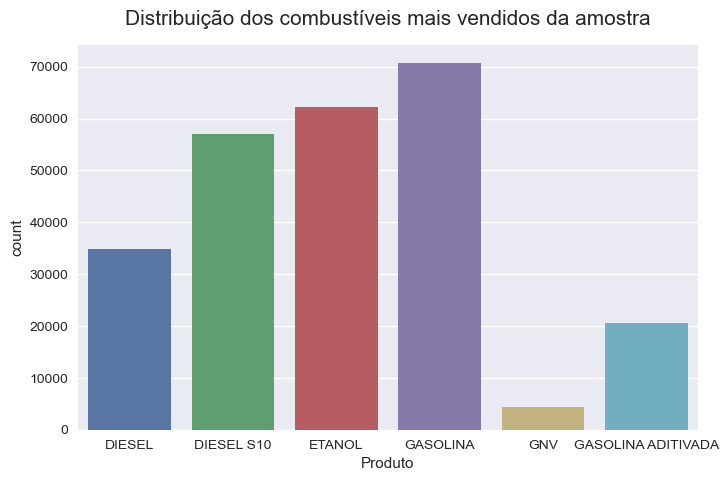

In [376]:
# Tamanho da figura
plt.figure(figsize=(8, 5))

# Gráfico
sns.countplot(x=df['Produto'])

# Configurações do gráfico
plt.title("Distribuição dos combustíveis mais vendidos da amostra", fontsize=15, y =1.03)

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">Maioria dos veículos domesticos convencionais são movidos a Etanol ou Gasolina; caminhões, e demais veículos de carga,  normalmente utilizam diesel. Isso é muito bem representado na distribuição dos combustíveis vendidos na amostra</font>

<hr style="border: 2px solid #00cd37;">

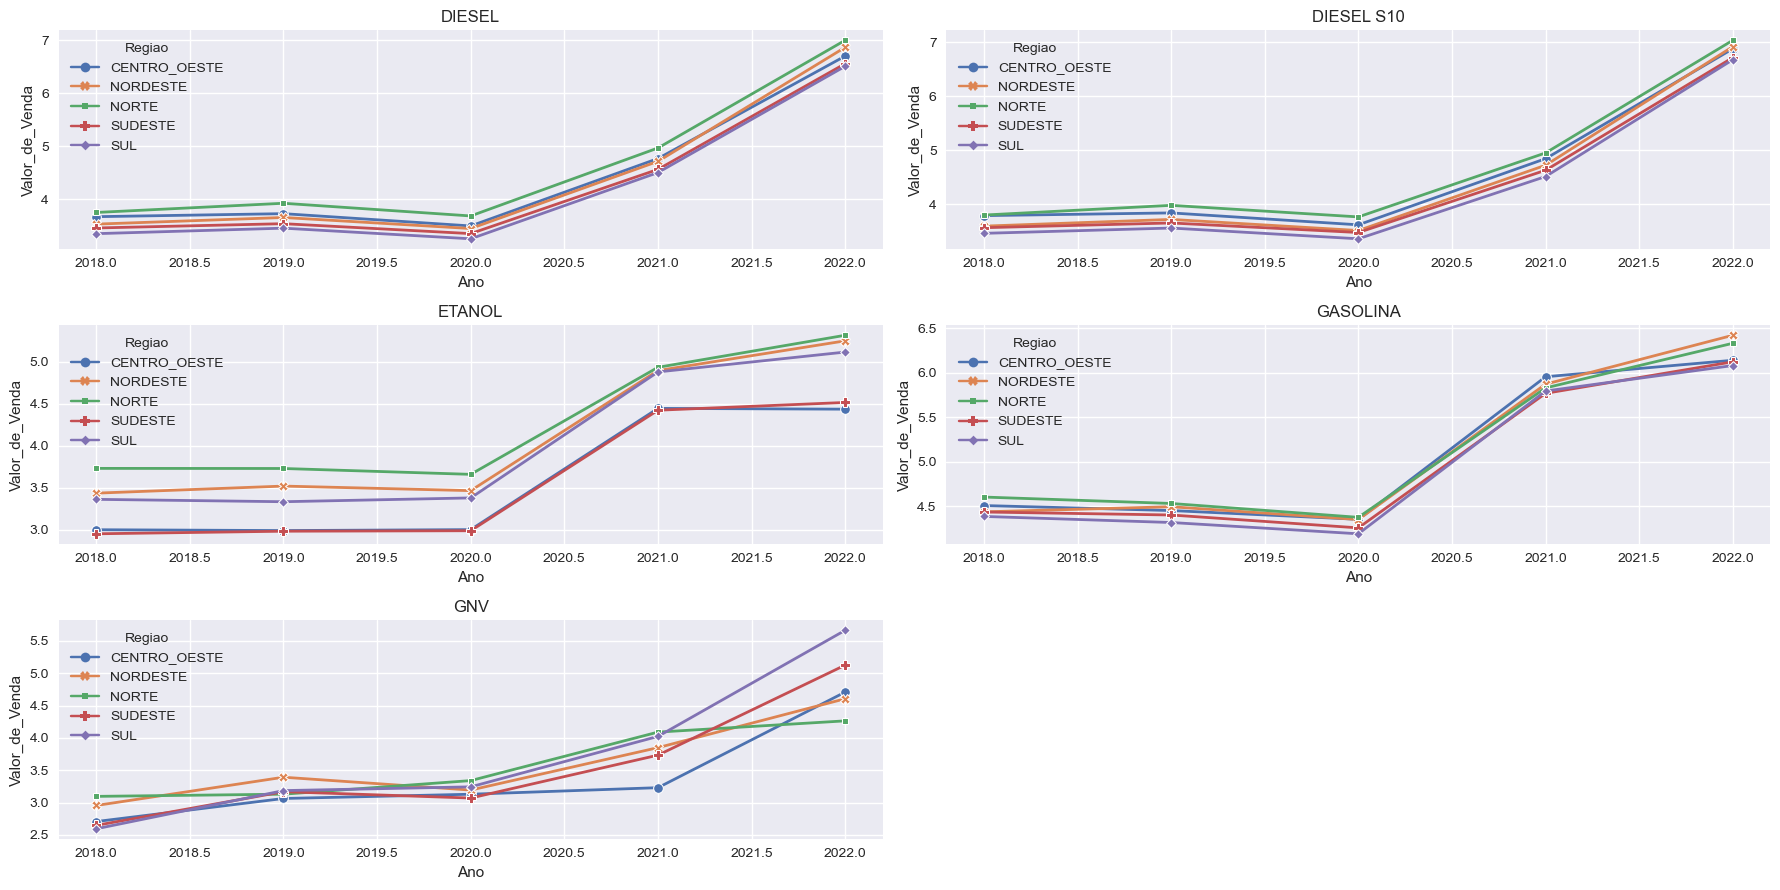

In [377]:
lista = [i for i in df['Produto'].unique()]

# Criando subplots
fig, axis = plt.subplots(3, 2, figsize=(18, 9))

i = 0

for gasolina in lista:
    regiao = df.query("Produto == @gasolina").groupby(['Regiao', 'Ano'])['Valor_de_Venda'].mean().to_frame().reset_index()
    
    if lista.index(gasolina) < 2:
        ax = sns.lineplot(data=regiao, x="Ano", y="Valor_de_Venda", hue='Regiao', style='Regiao', markers=True, dashes=False, palette='deep', linewidth=2, ax=axis[0][i])
        ax.set_title(gasolina)
        i += 1
    elif 2 <= lista.index(gasolina) < 4:
        ax = sns.lineplot(data=regiao, x="Ano", y="Valor_de_Venda", hue='Regiao', style='Regiao', markers=True, dashes=False, palette='deep', linewidth=2, ax=axis[1][i - 2])
        ax.set_title(gasolina)
        i += 1
    elif 4 <= lista.index(gasolina) < 5:
        ax = sns.lineplot(data=regiao, x="Ano", y="Valor_de_Venda", hue='Regiao', style='Regiao', markers=True, dashes=False, palette='deep', linewidth=2, ax=axis[2][0])
        ax.set_title(gasolina)
    
plt.tight_layout()
axis[2][1].axis('off')  # Remover eixo para mostrar apenas a tabela
plt.show()


<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">Etanol no sul e sudeste é mais de 50 centavos mais barato</font>

## <font color=#00cd37 style="font-size: 25px;">Maiores diferenças entre as regiões é no combustível de Gás natural, existindo diferenças de até 1,5 reais por metro cúbico de combustível entre as regiões Norte e Sul, por exemplo.</font>

## <font color=#00cd37 style="font-size: 25px;">O diesel é o que parece ter a distribuição de preço mais uniforme entre as regiões</font>

<hr style="border: 2px solid #00cd37;">

In [378]:
df_estado = df.query("Produto == 'GASOLINA'").groupby(['Estado'])['Valor_de_Venda'].mean().to_frame().reset_index()
df_estado

,Estado,Valor_de_Venda
0,ACRE,5.533918
1,ALAGOAS,5.079272
2,AMAPÁ,4.397370
3,AMAZONAS,4.994852
4,BAHIA,5.060741
5,CEARÁ,5.106609
6,DISTRITO_FEDERAL,4.924220
7,ESPÍRITO_SANTO,5.004001
8,GOIÁS,5.049015
9,MARANHÃO,4.798000


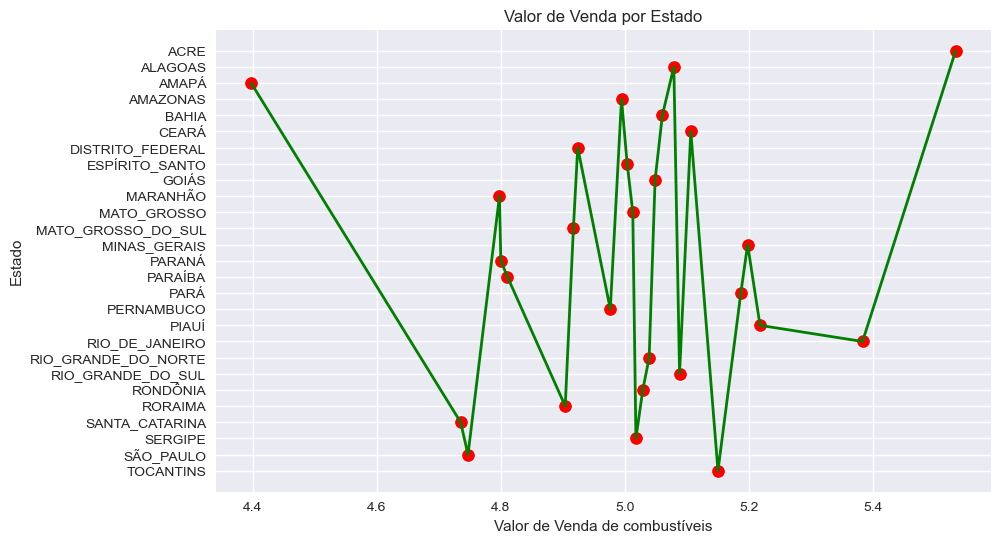

In [379]:
# Criar um subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar a linha
sns.lineplot(y=df_estado['Estado'], x=df_estado['Valor_de_Venda'], color='green', linewidth=2, ax=ax)

# Adicionar marcadores usando scatterplot
sns.scatterplot(y=df_estado['Estado'], x=df_estado['Valor_de_Venda'], marker='o', color='red', s=100, ax=ax)

# Configurar rótulos e título
ax.set_xlabel('Valor de Venda de combustíveis')
ax.set_ylabel('Estado')
ax.set_title('Valor de Venda por Estado')

# Mostrar o gráfico
plt.show()

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">O mais interessante aqui é notar os pontos discrepantes: O Acre, com larga vantagem, é o Estado que se gasta mais com combustível(Gasolina) no Brasil,  5.50/Litro. E Amapá o que paga em média menos, 4.39/Litro.</font>

## <font color=#00cd37 style="font-size: 25px;">Maioria dos Estados estão entre 4.80 e 5.20 por litro de gasolina </font>

<hr style="border: 2px solid #00cd37;">

# <font color="#4500ff" style="font-size: 30px;">3 .Preparação dos Dados para Previsão // Divisão em Conjuntos de Treinamento e Teste // Treinamento</font>
<hr style="border: 2px solid #4500ff;">

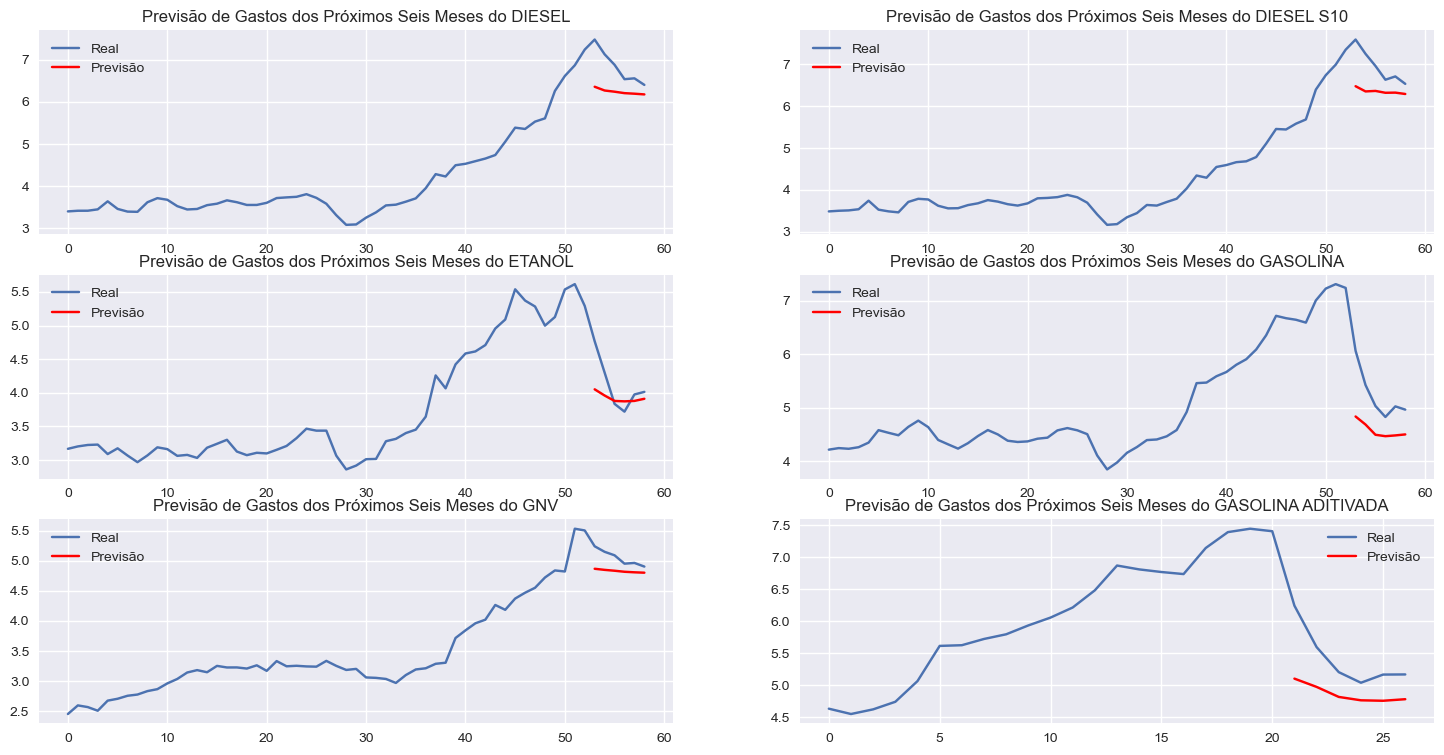

In [401]:
# Função para treinar o modelo ARIMA e fazer previsões
def treino_arima_e_forecast(data):
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=6)
    return forecast

# Função para calcular o MAPE
def calculando_mape(atual, forecast):
    forecast.index = df_agrupado['VALOR_COMBUSTIVEL'].tail(6).index
    return (np.abs(atual - forecast) / atual).mean() * 100

# Listas para armazenar as métricas
lista_rmse = []
lista_mae = []
lista_mape = []

# Criando subplots
fig, ax = plt.subplots(3, 2, figsize=(18, 9))
i = 0

for produto in df['Produto'].unique():
    df_loop = df.query("Produto == @produto")
    
    df_agrupado = df_loop[['Valor_de_Venda', 'Data_da_Coleta']].copy()
    df_agrupado.columns = ['VALOR_COMBUSTIVEL', 'DATA']
    df_agrupado['DATA'] = pd.to_datetime(df_agrupado['DATA'], format='%Y/%m/%d')
    
    df_agrupado = df_agrupado.groupby([df_agrupado['DATA'].dt.year, df_agrupado['DATA'].dt.month]).mean(numeric_only=True)
    df_agrupado.index = range(len(df_agrupado))
    
    forecast = train_arima_and_forecast(df_agrupado['VALOR_COMBUSTIVEL'])
    
     # Calcula as métricas
    valores_atuais = df_agrupado['VALOR_COMBUSTIVEL'].tail(6)
    rmse = np.sqrt(mean_squared_error(valores_atuais, forecast))
    mae = mean_absolute_error(valores_atuais, forecast)
    mape = calculando_mape(valores_atuais, forecast)
    
    lista_rmse.append(rmse)
    lista_mae.append(mae)
    lista_mape.append(mape)
    
    
    # Plotar os resultados
    if i < 2:
        ax[0][i].plot(df_agrupado.index, df_agrupado['VALOR_COMBUSTIVEL'], label='Real')
        ax[0][i].plot(forecast.index, forecast, label='Previsão', color='red')
        ax[0][i].set_title(f'Previsão de Gastos dos Próximos Seis Meses do {produto}')
        ax[0][i].legend()
        i += 1
    
    elif 2 <= i < 4:
        ax[1][i-2].plot(df_agrupado.index, df_agrupado['VALOR_COMBUSTIVEL'], label='Real')
        ax[1][i-2].plot(forecast.index, forecast, label='Previsão', color='red')
        ax[1][i-2].set_title(f'Previsão de Gastos dos Próximos Seis Meses do {produto}')
        ax[1][i-2].legend()
        i += 1
    elif i >= 4:
        ax[2][i-4].plot(df_agrupado.index, df_agrupado['VALOR_COMBUSTIVEL'], label='Real')
        ax[2][i-4].plot(forecast.index, forecast, label='Previsão', color='red')
        ax[2][i-4].set_title(f'Previsão de Gastos dos Próximos Seis Meses do {produto}')
        ax[2][i-4].legend()
        i += 1
plt.show()

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">Depois de toda a análise que fizemos, decidi utilizar um modelo de séries temporais (são técnicas estatísticas usadas para analisar e prever padrões em dados ao longo do tempo. Eles capturam dependências temporais, como tendências, sazonalidades e variações, permitindo a previsão de valores futuros.) E prever a variação dos preços dos combustíveis ao longo de 6 MESES </font>

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">Obtivemos os seguintes resultados:</font>
---

> <font color=#00cd37 style="font-size: 25px;">DIESEL: redução de -3.5% </font>
---
> <font color=#00cd37 style="font-size: 25px;">DIESEL S10: redução de -3.7% </font>
---
> <font color=#00cd37 style="font-size: 25px;">ETANOL: redução de -2.6% </font>
---
> <font color=#00cd37 style="font-size: 25px;">GASOLINA: redução de -9.3% </font>
---
> <font color=#00cd37 style="font-size: 25px;">GNV: redução de -9.3% </font>

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">É importante lembrar que esses dados vão até 2022. Vamos comparar as previsões com os dados atuais que temos</font>

---

> <font color=#00cd37 style="font-size: 25px;">DIESEL: RS 6,40(09/2022) ---- RS 6,15(04/2023) --- RS 6,18(previsão)</font>
---
> <font color=#00cd37 style="font-size: 25px;">DIESEL S10: RS 6,53(09/2022) ---- RS 6,25(04/2023) --- RS 6,29(previsão)</font>
---
> <font color=#00cd37 style="font-size: 25px;">ETANOL: RS 4,01 (10/2022) ---- RS 4,58 (04/2023) --- RS 3,90 (previsão) </font>
---
> <font color=#00cd37 style="font-size: 25px;">GASOLINA: RS 4,96 (08/2022) ---- RS 5,08 (02/2023) --- RS 4,50 (previsão) </font>
---
> <font color=#00cd37 style="font-size: 25px;">GNV: RS 4,96 (10/2022) ---- RS 4,48 (04/2023) --- RS 4,80 (previsão) </font>
---

<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">As previsões indicavam queda em todos os combustíveis, mas na realidade Etanol e Gasolina subiram. os dois tipos de Diesel e GNV obtiveram redução do preço, sendo o último o único a ter uma disparidade considerável entre previsão e real</font>

<hr style="border: 2px solid #00cd37;">

# <font color="#4500ff" style="font-size: 30px;">4. Avaliação do Modelo </font>
<hr style="border: 2px solid #4500ff;">

In [400]:
# Exibindo métricas
for i, produto in enumerate(df['Produto'].unique()):
    print(f"Produto: {produto}")
    print(f"RMSE: {lista_rmse[i]:.2f}")
    print(f"MAE: {lista_mae[i]:.2f}")
    print(f"MAPE: {lista_mape[i]:.2f}%")
    print("-" * 30)

Produto: DIESEL
RMSE: 0.67
MAE: 0.59
MAPE: 8.42%
------------------------------
Produto: DIESEL S10
RMSE: 0.67
MAE: 0.59
MAPE: 8.31%
------------------------------
Produto: ETANOL
RMSE: 0.33
MAE: 0.24
MAPE: 5.52%
------------------------------
Produto: GASOLINA
RMSE: 0.71
MAE: 0.65
MAPE: 12.02%
------------------------------
Produto: GNV
RMSE: 0.24
MAE: 0.22
MAPE: 4.33%
------------------------------
Produto: GASOLINA ADITIVADA
RMSE: 0.61
MAE: 0.54
MAPE: 9.64%
------------------------------


<hr style="border: 2px solid #00cd37;">

## <font color=#00cd37 style="font-size: 25px;">Observando as métricas podemos perceber que o modelo ficou melhor ajustado para o Etanol, GNV. Os demais tiveram um desempenho mediano (segundo as métricas).</font>

<hr style="border: 2px solid #00cd37;">